<a href="https://colab.research.google.com/github/ScottMktn/NBA-All-Star-Prediction/blob/master/FP4Group21Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Spring 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Basketball All-Stars</h3> </center>
<center><h4>Itamar Zik, Alanna Pasco, Scott Nguyen, Josh Rodriguez</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

For this project we looked to predict the best performing players in the National Basketball Association (NBA) using different machine learning techniques. We found this project to be meaningful because we are all basketball fans and believe that advanced metrics can help team managers build better teams.

**Method**: Our dataset consists of 18 variables that describe the performance statistics, biometrics, and other historical information about all players over the past 4 NBA seasons (2016 - 2020). This includes our target variable - which is whether or not they were nominated as an "All-Star" player. Using this dataset, we tested multiple hypotheses about the factors that contribute most to an "All-Star" caliber season. We have trained machine learning models to predict whether or not a player would recieve this recognition.

**Results**: During hypothesis testing, we found that our hypotheses were strongly supported by our tests. In addition, our machine learning models were able to perform with considerable accuracy (our decision-tree had 96% accuracy and our SVC had around 97% accuracy after tuning).

**Discussion**: We were unable to support our hypotheses using t-tests for independant samples because the set of all-star players is not going to normally distributed for any of the metrics. This is because the best performing players will be skewed in nearly every measurement - that is why they are the best players. From the algorithms that we chose to compare for our analysis, we found that Decision Trees was the best performing algorithm.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

In each NBA season, there are anywhere between 450 - 600 active players in total. Out of that total, the best 24 players from that season are nominated as "All Stars". The "All-Star" players are selected to play in an exhibition game halfway through the season. 

Although at face value the "All-Star" nomination does not mean much, it is one of the biggest honors that a player can receive, and it is used around the NBA as a litmus test for whether or not a player is in the top tier of players - and good enough to lead a team to a successful season. For that reason, we and many basketball experts alike use the "All-Star" category as the best evaluator for the best performing players in a given season.

From researching our problem, we want to learn what makes a player’s case to be an All-Star. Are All-Star awards mostly driven by the player’s statistics or are they driven by more qualitative aspects such as their draft round, team, or country? 

It is important to tackle our problem for a variety of reasons. One of these reasons is for the player due to their contracts having incentives and bonuses based on if they are an All-star or not. If a player is likely to be an All-star given their stats and qualitative factors, they should structure their contract to include and account for these bonuses.

Another reason is for NBA teams because if there is a strong correlation between "All-Star" probability and players being selected early on, teams should make trades in order to get top picks in the draft. Likewise, if there is no correlation and draft round and number do not indicate if a player is going to be an All-star, teams should focus on trading high picks for multiple middle round picks in order to increase their chances of drafting a future All-star player. 


There is previous work on our topic of predicting or selecting All-stars for a given season. However, most of this work does not use any statistical analysis (Buckley, 2019) or does not care for qualitative attributes - such as team, draft position, and alma mater. This research projects player performance over time and uses metrics to do so, but they are not predicting whether or not a player will receive all star recognition (Queenie, 2020). We used their analysis and predictions as a stepping stone to direct us toward a more informative and relevant model. 

We believe that usage rate (USG%) and points per game (PPG) are going to be the most positively correlated with the likelihood that a player will be an All-star for a given season. After this, we believe that a player’s team and draft number are going to have the next highest positive correlations. This is because different teams have differen market sizes, so a team like the Golden State Warriors - that has a bigger fanbase and therefore more money to offer All-Star players - will be more likely to have an All-Star players than smaller market teams like the Sacremento Kings. Furthermore, we beleive that draft number will be a valuable indicator because players that are drafted higher are typically very successful because they are highly scouted. In a simple assessment of the players regarded as the greatest players to ever play, we can see that most of them were drafted very high (for example, Michael Jordan, Lebron James, Bill Russell were all drafted in the top 3 of their draft classes).

It would be interesting to see from our analysis where the ideal “age” of an All-star lies. Will this line up with their “physical” prime where we can assume they are at their peak performance? Or does being in the NBA long enough allow a player a level of exposure that makes them more “popular” than their younger peers. 

Does the draft year affect draft position as an indicator for an All-Star? Are Points per Game and Usage rate the best indicators of an All-Star player? What machine learning regression algorithm will provide the best results, SVC, KNN, Bayes, Or Decision Tree? 


**Sources:**

Silver, Nate. “NBA Player Projections.” FiveThirtyEight, 22 Oct. 2019, [projects.fivethirtyeight.com/2020-nba-player-projections/](https://)

Buckley, Zach. “NBA Player Projections.” Bleacher Report, Bleacher Report, 25 Dec. 2019, [bleacherreport.com/articles/2868052-predicting-which-players-make-2020-nba-all-star-game](https://)

So, Queenie, et al. “Case Study: Machine Learning Applications - Making NBA Predictions.” Oursky Posts, 7 Feb. 2020, [blog.oursky.com/2019/11/26/machine-learning-applications-nba-predictions/.
](https://)

## 2. METHOD

### 2.1. Data Acquisition


Data for this analysis was collected from the official statistics repository for the NBA from the official NBA website. Linked here:
https://stats.nba.com/players/bio/

Our full dataset contains combined statistical data from the last four basketball seasons. In total we have 1570 rows where each row represents a player's biometrics and performance stats. Because there is data from multiple years, there is of course data from the same player multiple years in a row, however this is acceptable because we would like to predict, in general, if any arbitrary player is an All-Star of that season given the player's stats from that season, and All-Star players change every season. 

Our data is organized so that the first group of columns contain performance data, followed by draft information, followed by one-hot-encoded data on the players' team and country, and finally our target data: "All-Star?" column.

Our features are named with keys, some of which are acronyms explained here:<br>
AGE<br>
HEIGHT<br>
WEIGHT (Inches)<br>
DRAFT YEAR<br>
DRAFT ROUND - 1 or 2 (there are two rounds with 30 picks each)<br>
DRAFT NUMBER - a number from 1 - 60 where 1-30 are those picked in first round and 31-60 are those picked in the second round<br>
GP (# of Games Played)<br>
PTS (Points Scored per Game)<br>
REB (Rebounds per Game)<br>
AST (Assists per Game)<br>
NETRTG (Net Rating) - Measures the team's score when the player enters vs exits the floor to determine their value to the team's overall scoring<br>
OREB% (Offensive Rebound Percent)<br>
DREB% (Defensive Rebound Percent)<br>
USG% (Usage Rate) - an estimate of the percentage of team plays used by a player while he was on the floor.<br>
TS% (True Shooting %) - measures a player's efficiency at shooting the ball<br>
AST% (Assist %)<br>

In the following section of our features we have one hot encoded features that represent the team a player is on during that season and the university the player went to. In our feature selection analysis we found that the university the player went to was the least valuable feature to our model and therefore that data was removed in our feature selection process. 

### 2.2. Variables


<b>Hypothesis Testing:</b>
We predict that usage rate (USG%) and points per game (PTS) will be the two features most strongly positively correlated with resulting allstars. It may sound obvious, but this means that players who get their hands on the ball more often and score more points are likely to be chosen to be an all star player for that season. This makes sense. 

However one other observation we made was to question whether age will have a positive or negative correlatin with all-star status. Does youth make players more likely due to their energy/health or does long-time exposure and popularity (and therefore older age) make a player more likely to be an all-star? This we explore in our exploration/visualization section.

<b>Dependent variable:</b> All-star?<br>
<b>Independent variable:</b> Usage rate, Points per game, Age<br>

<b>Predictive Models:</b>
Our feature variables include demographic data and playing statistics. Our target variable is past data on whether a player, given their feature stats within one season, was picked to be an allstar that season. Our target data is categorical with 1 representing all stars and 0 representing non-all stars. 

### 2.3. Data Analysis


<b>Predictive Model Description:</b>
Because "All Stars" are picked and change season to season, we can attempt to create a model that predicts whether a player will be an allstar based on their stats from that season. 

Our features include the biometric and statistical playing data above, however while cleaning our data we came across a challenge in the DRAFT NUMBER column. This column contained both numeric data (1 to 60 based on the assigned number) as well as strings, "Undrafted", for those who were not drafted. We pondered many ways to fix this issue, including changing "Undrafted" to the number 61, however this would have a skewed impact on the outcome of our model. Ultimately, we decided to remove all undrafted players because we realized that if a player is undrafted they will NOT subsequently be an all star (this has only ocurred twice in history before the timeframe of our data and is therefore an outlier) and so there was no point in including undrafted players in our model. 

Due to the above implication, our model specifically predcits whether a <i>drafted</i> player will be picked to be an all-star.

Essentially, because we are training our model with data that has been classified already as all-star or non-all-star, this is a supervised learning problem that uses classification model to predict the target. 

<b>Machine Learning Algorithm Choice:</b>
In our analysis, the outcome of four classification algorithms were compared: K-nearest neighbor, support vector machine, Gaussian Naive Bayes and Decision Tree. Out of the four, Gaussian Naive Bayes performed worst, likely due to the very high number of features (18) we have. Support Vector Machine performed the best, and this is again likely due to the fact that our model pulls from a high number of features and Support Vector Machine algorithms benefit from there being a high number of features.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

#### Import and Cleaning

In [0]:
import pandas as pd

#IMPORT DATA FROM GITHUB
data_urls = [r'https://github.com/zikitamar9/DS3000-Final-Project/raw/master/2016-2017-Training-Data.xlsx', 
             'https://github.com/zikitamar9/DS3000-Final-Project/raw/master/2017-2018-Training-Data.xlsx',
             'https://github.com/zikitamar9/DS3000-Final-Project/raw/master/2018-2019-Training-Data.xlsx',
             'https://github.com/zikitamar9/DS3000-Final-Project/raw/master/2019-2020-Training-Data.xlsx']
data16, data17, data18, data19 = [pd.read_excel(url) for url in data_urls]

#For some reason 2019 has an "All-star?" column while the rest of the years' data has an "All-Star?" column (both upper-case)
#so we must synchronize the name of our target data column
data19["All-Star?"] = data19["All-star?"]
data19.drop("All-star?", axis=1, inplace=True)

#Now combine all the years' data
datadf = pd.concat([data16, data17, data18, data19], axis=0).dropna()

#COMPREHENSIVE DATA CLEANING
#Fix the height column - convert ft-in to inches only 
def parse_height(s):
    slist = s.split("-")
    return (int(slist[0]) * 12 + int(slist[1]))
datadf['HEIGHT'] = datadf['HEIGHT'].apply(lambda x: parse_height(x))

#The "DRAFT NUMER" and "DRAFT ROUND" contain mostly numeric data but also strings. Remove strings and replace with numeric data
datadf = datadf[datadf["DRAFT NUMBER"] != "Undrafted"]
datadf = datadf[datadf["DRAFT NUMBER"] != ""]
datadf['DRAFT ROUND'] = datadf['DRAFT ROUND'].apply(int)
datadf['DRAFT NUMBER'] = datadf['DRAFT NUMBER'].apply(int)

#Create dummies for team and college categorical data
datadf = pd.concat([datadf.drop('TEAM', axis=1), pd.get_dummies(datadf.TEAM)],axis=1)
datadf = pd.concat([datadf.drop('COLLEGE', axis=1), pd.get_dummies(datadf.COLLEGE)],axis=1)

#The Player (name) column and Country column are not numeric data and irrelevant for our model
datadf.drop(["PLAYER","COUNTRY"], axis = 1, inplace=True)

#Fix all-star column; change yes/no to 1/0
datadf["All-Star?"].replace({'yes': 1, 'no': 0}, inplace=True)

target = datadf["All-Star?"]
features = datadf.drop("All-Star?", axis=1)

#Finally, our data is organized so that the first group of columns contain demographic data,
#followed by draft information and playing statistics,
#followed by one-hot-encoded data on the players' team and country,
#and finally our target data: "All-Star?" column

datadf = pd.concat([features, target], axis=1)
datadf

datadf.to_csv('file_name.csv')

#### Feature Selection
Using a univariate selection method, we will check whether each individual feature has a statistically significant relationship to the target and only keep the top 70 percentile that is most relevant to our classification model. The reason for keeping the top 70 percentile instead of applying the K-Best feature selection method or lowering the percentile is not to defeat the purpose of our one-hot-encoded data. If we were to keep only the top 3 to 5 features, we would certainly lose all of the college and team data which actually should be relevant to making predicitons. 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

#Define the selection method and specify the percentile.
#By default, score_func = f_classif
select = SelectPercentile(percentile = 70)
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
#the tranformation only keeps the 70% most relevant features 
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 81 145 147 155] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
#Based on the output here, 116 of 168 (70%)of the best, most-relevant features were kept:
X_train_selected.shape

(1177, 116)

In [0]:
#Lets see side by side which features were the weakest indicators of predicting all-stars:
zipped = zip(features.columns,select.get_support())
for feature_boolean in zipped:
  if feature_boolean[1] == False:
    print(feature_boolean)
#It seems as though college data is not a good predictor of all-stars afterall. 

('ATL', False)
('LAL', False)
('MIL', False)
('NYK', False)
('POR', False)
('SAS', False)
('UTA', False)
('WAS', False)
('Alabama', False)
('Boise State', False)
('Brigham Young', False)
('Cal State-Long Beach', False)
('Clemson', False)
('Cleveland State', False)
('College of Charleston', False)
('Connecticut', False)
('Duke', False)
('Eastern Washington', False)
('Georgia Institute of Technology', False)
('Hofstra', False)
('Louisville', False)
('Miami (FL)', False)
('Michigan State', False)
('Minnesota', False)
('Mississippi State', False)
('Missouri State', False)
('Nevada-Las Vegas', False)
('Norfolk State', False)
('Ohio State', False)
('Richmond', False)
('Seton Hall', False)
('South Carolina', False)
('St. Bonaventure', False)
("St. John's (NY)", False)
('Syracuse', False)
('Temple', False)
('Texas Tech', False)
('Texas-Arlington', False)
('Tulane', False)
('University of California, Berkeley', False)
('University of Colorado Boulder', False)
('University of Dayton', False)
('U

In [0]:
#Finally, for simplification, rename the selected feature variables for later use:
X_train = X_train_selected
X_test = X_test_selected

### 3.2. Data Exploration
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.00,8.00)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


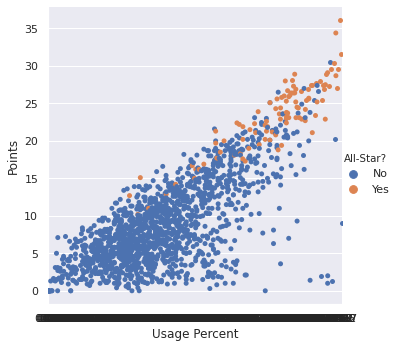

In [0]:
# Visualizing points per game against usage rate
ax_ppg_usg = sns.catplot(x = "USG%", y = "PTS", hue="All-Star?", data = datadf, legend_out=True)
# Replace labels
for t, l in zip(ax_ppg_usg._legend.texts, ['No', 'Yes']): t.set_text(l)
ax_ppg_usg.set(xlabel='Usage Percent', ylabel='Points')

#https://github.com/zikitamar9/DS3000-Final-Project/blob/master/Screen%20Shot%202020-04-17%20at%2010.48.15%20PM.png

The graph below positive correlation between usage percentage and points per game for a player.
Not only that, but there is a clear trend showing that most of the All-Star players in the last
four years lie at the upper echelons of usage rate percentage and points per game.

[Text(0, 0.5, 'Points Scored'), Text(0.5, 0, 'Age')]

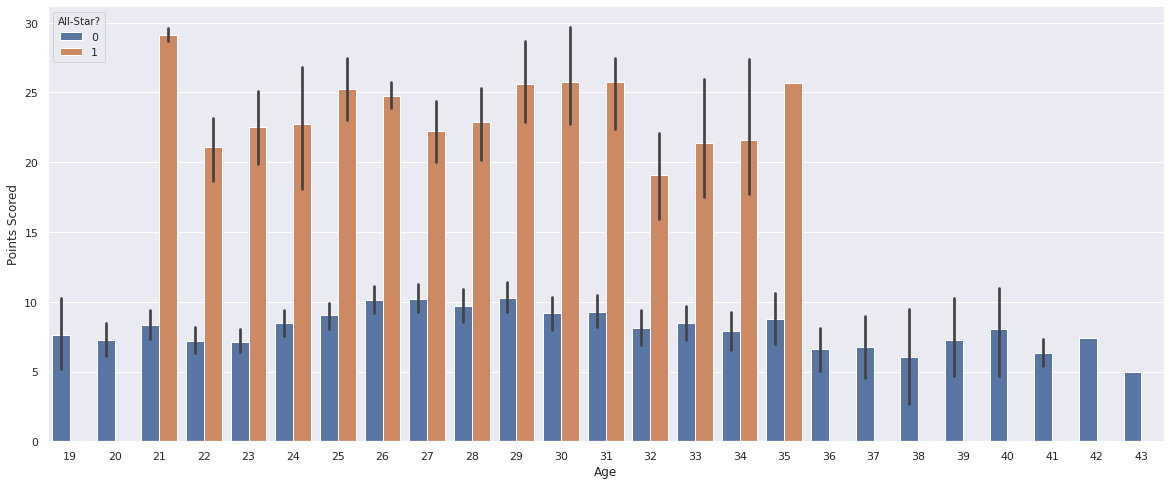

In [0]:
# Visualizing age against points for All-Stars compared to their peers
ax_points = sns.barplot(x = "AGE", y = "PTS", hue="All-Star?", data = datadf)
ax_points.set(xlabel='Age', ylabel='Points Scored')

#https://github.com/zikitamar9/DS3000-Final-Project/blob/master/Screen%20Shot%202020-04-17%20at%2010.44.50%20PM.png

We decided to measure whether age has an impact on the number of points a player gains. Looking at this visualization,
we can see that across the board age did not have a terribly strong impact on point scoring, though there is 
a small trend in player gaining more points between the ages of 25 and 33 which reduces at the two tails
of the age data.

'  '

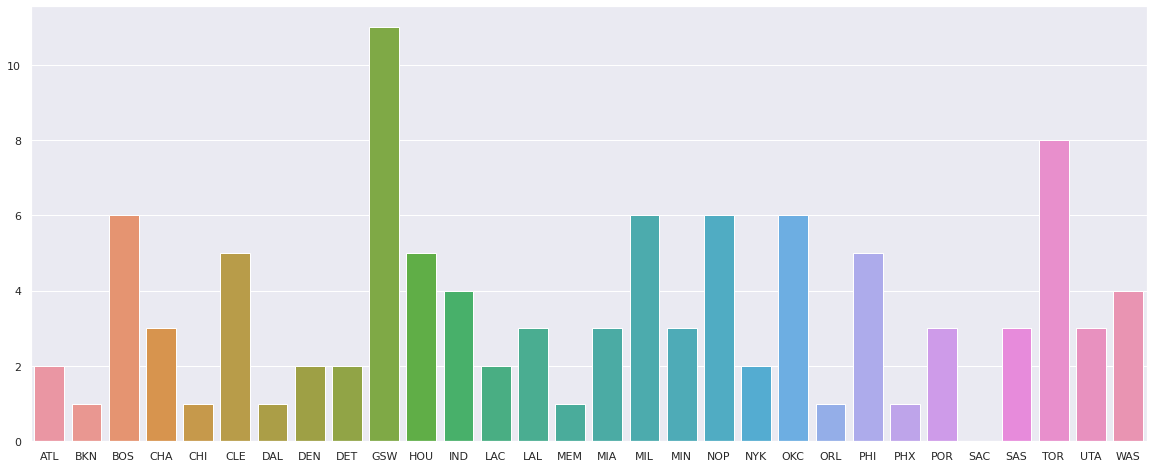

In [0]:
# Visualizing teams with the most number of All-Stars

#Extract the allstar column + team columns (one-hot-encoded data) into a new df:
teams_df = datadf.iloc[:,16:46]
teams_df["All-Star?"] = datadf["All-Star?"]
#Now only keep the ones that contain allstars:
teams_df = teams_df[teams_df["All-Star?"] == 1]
teams_df.drop("All-Star?", axis=1, inplace=True)

allstar_count = {}
for team in teams_df.columns:
    allstar_count[team] = teams_df[team].sum()

ax_team = sns.barplot(x = list(allstar_count.keys()), y = list(allstar_count.values()))

#https://github.com/zikitamar9/DS3000-Final-Project/blob/master/Screen%20Shot%202020-04-17%20at%2010.45.08%20PM.png

Here we can clearly see that some teams produce more allstars than others. While this visualization contains
the full set of data, it is interesting to note that the results of our feature selection method above have shown that
teams who are the lowest producers of all-stars were the least relevant data points in predicting

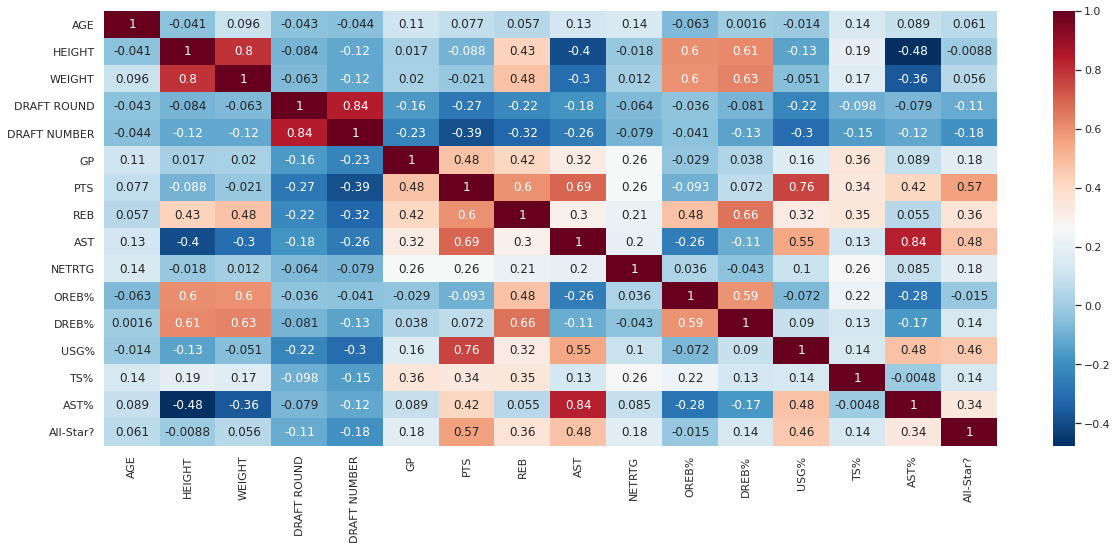

In [0]:
## Visualizing performance stats and biometrics against against each other to see correlation between all variables
d1 =  datadf.iloc[:,0:16]
d2 = datadf[['All-Star?']]

matrix_data = pd.concat([d1, d2], axis=1)
matrix_data

correlation_matrix = matrix_data.corr()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, cmap='RdBu_r',annot=True,linewidth=0)

#https://github.com/zikitamar9/DS3000-Final-Project/blob/master/Screen%20Shot%202020-04-17%20at%2010.45.18%20PM.png

Lastly, here we can see that the variables with  the strongest relationship to the All-Star honors are assist rate (USG% - 0.48), usage rate (USG% - 0.46), and points per game (PTS - 0.57). Although these are still moderate positive relationship, they show a stronger relationship to the all-star variable than any of the other metrics.


### 3.3. Model Construction

In our introduction, we proposed the hypothesis that usage rate and points per game would be the two features most strongly positively correlated with allstar data, meaning that as players get their hands on the ball and score more points during a game it directly and positively increases their chance of being an all-star. 

One other observation we made was to question whether age will have a positive or negative correlatin with all-star status. Does youth make players more likely due to their health or does long-time exposure and popularity (and therefore older age) make a player more likely to be an all-star?

<b>Null Hypothesis:</b> Usage rage has no impact on whether a player is an all-star. A player can get their hands on the ball more often and it wont necesarily make them an all-star, and if it does then it's just by chance.<br>
<b>Alternate Hypothesis:</b> Usage rate has a positive impact / correlation with players being an all-star.<br>
<b>Dependent variable:</b> All-star?<br>
<b>Independent variable:</b> Usage rate<br>

We are setting our alpha score to 0.05.

Exploratory Analysis:

In [0]:
from scipy import stats

data = datadf
data.head()

selected = data[['All-Star?', 'DRAFT NUMBER']]
selected = selected.set_index(['All-Star?'])
selected

descriptives = selected.groupby("All-Star?").agg(["count", "mean", "std", "sem"])
descriptives

print(selected.groupby('All-Star?').mean())

# creates the no picks
no = selected.loc[1]['DRAFT NUMBER'].head(103)

# creates the yes picks
yes = selected.loc[0]['DRAFT NUMBER']

results = stats.ttest_ind(yes, no)
tstatistic = str(round(results[0], 2))
pvalue =  results[1]


deg_freedom = len(no) + len(yes) - 2

ttest_header = '\n------------------------------\nT-test for Independent Samples\n------------------------------\n'
t_test = 't(' + str(deg_freedom) + ') = ' + tstatistic + ', p=' + format(pvalue)
assum_header = '\n\n\nAssumption Checks\n-------------------'
var_header = '\n\nAssumption of Equality of Variances:'
levene = '\n         ' + str(stats.levene(no, yes))
norm_header = '\nAssumption of Normality:'
no_shapiro = stats.shapiro(no)
yes_shapiro = stats.shapiro(yes)

def assumption(x):
    assumption = '         Assumption is '
    if x > .05:
      assumption = assumption + 'met. p > .05'
    else:
      assumption = assumption + 'violated. p < .05'
    return assumption

print(ttest_header)
print(t_test + assum_header + var_header + levene)
print(assumption(stats.levene(yes, no)[1]))
print(norm_header)
print('         Non All-Stars: ' + str(no_shapiro))
print('        ' + assumption(no_shapiro[1]))
print('\n         All-Stars : ' + str(yes_shapiro))
print('        ' + assumption(yes_shapiro[1]) + '\n\n\n')

           DRAFT NUMBER
All-Star?              
0             22.929107
1             11.407767

------------------------------
T-test for Independent Samples
------------------------------

t(1568) = 7.39, p=2.4018659944636314e-13


Assumption Checks
-------------------

Assumption of Equality of Variances:
         LeveneResult(statistic=19.020122168570587, pvalue=1.377767662693874e-05)
         Assumption is violated. p < .05

Assumption of Normality:
         Non All-Stars: (0.7667288780212402, 1.7073401720191228e-11)
                 Assumption is violated. p < .05

         All-Stars : (0.9463033080101013, 1.072044425928823e-22)
                 Assumption is violated. p < .05





It appears that the mean draft position for non-all stars is 22 while it is 11 for non-all stars. We round down because draft position is an integer. This means that all-star players are drafted 10 positions higher on average than other players. To see if this is a significant difference, we run a t-test of independent samples:

This t-test measures the differences in draft position between all-star and non all-star players. As we can see the assumption of equality of variances and the assumption of normality are not met for both groups. This makes sense because the players who NBA recruiters beleive have the highest potential for success are usually drafted very high. From the t-test, we can see that we get a considerably small pvalue. This means that the difference we measured did not occur by chance, and that there really is a significant difference between the draft position of an all star and that of a non-all star.


In [0]:
from scipy import stats

data = datadf
data.head()

selected = data[['All-Star?', 'PTS']]
selected = selected.set_index(['All-Star?'])
selected

descriptives = selected.groupby("All-Star?").agg(["count", "mean", "std", "sem"])
descriptives

print(selected.groupby('All-Star?').mean())

# creates the no picks
no = selected.loc[1]['PTS'].head(103)

# creates the yes picks
yes = selected.loc[0]['PTS']

results = stats.ttest_ind(no, yes)
tstatistic = str(round(results[0], 2))
pvalue =  results[1]


deg_freedom = len(no) + len(yes) - 2

ttest_header = '\n------------------------------\nT-test for Independent Samples\n------------------------------\n'
t_test = 't(' + str(deg_freedom) + ') = ' + tstatistic + ', p=' + format(pvalue)
assum_header = '\n\n\nAssumption Checks\n-------------------'
var_header = '\n\nAssumption of Equality of Variances:'
levene = '\n         ' + str(stats.levene(no, yes))
norm_header = '\nAssumption of Normality:'
no_shapiro = stats.shapiro(no)
yes_shapiro = stats.shapiro(yes)

def assumption(x):
    assumption = '         Assumption is '
    if x > .05:
      assumption = assumption + 'met. p > .05'
    else:
      assumption = assumption + 'violated. p < .05'
    return assumption

print(ttest_header)
print(t_test + assum_header + var_header + levene)
print(assumption(stats.levene(no,yes)[1]))
print(norm_header)
print('         Non All-Stars: ' + str(no_shapiro))
print('        ' + assumption(no_shapiro[1]))
print('\n         All-Stars : ' + str(yes_shapiro))
print('        ' + assumption(yes_shapiro[1]) + '\n\n\n')

                 PTS
All-Star?           
0           8.610770
1          23.247573

------------------------------
T-test for Independent Samples
------------------------------

t(1568) = 27.23, p=5.567797485597138e-134


Assumption Checks
-------------------

Assumption of Equality of Variances:
         LeveneResult(statistic=2.8922728675286065, pvalue=0.08920356833258206)
         Assumption is met. p > .05

Assumption of Normality:
         Non All-Stars: (0.9816946983337402, 0.16538384556770325)
                 Assumption is met. p > .05

         All-Stars : (0.9543696045875549, 5.526131543454304e-21)
                 Assumption is violated. p < .05





It appears that the mean points per game for non-all stars is 8.6 while it is 23.2 for non-all stars. This means that all-star players score 15 more poiints on average than other players. To see if this is a significant difference, we run a t-test of independent samples.

This t-test measures the differences in points per game between all-star and non all-star players. As we can see the assumption of equality of variances is met and the assumption of normality for non-all stars is not met. However, the assumption of normality for All-Stars is violated. This makes sense because all-star players tend to have a much higher points per game statistic than other players. Because basketball is a game that is won by scoring, it makes sense the best players are going to have the highest average points per game. From the t-test, we can see that we get a considerably small pvalue. In fact, this p-value is so small that I left it unformatted because it is followed by 134 decimal points. This means that the difference we measured did not occur by chance, and that there really is a significant difference between points per game of an all star and points per game of a non-all star.

In [0]:
from scipy import stats

data = datadf
data.head()

selected = data[['All-Star?', 'USG%']]
selected = selected.set_index(['All-Star?'])
selected

descriptives = selected.groupby("All-Star?").agg(["count", "mean", "std", "sem"])
descriptives

print(selected.groupby('All-Star?').mean())

# creates the no picks
no = selected.loc[1]['USG%'].head(103)

# creates the yes picks
yes = selected.loc[0]['USG%']

results = stats.ttest_ind(no, yes)
tstatistic = str(round(results[0], 2))
pvalue =  results[1]


deg_freedom = len(no) + len(yes) - 2

ttest_header = '\n------------------------------\nT-test for Independent Samples\n------------------------------\n'
t_test = 't(' + str(deg_freedom) + ') = ' + tstatistic + ', p=' + format(pvalue)
assum_header = '\n\n\nAssumption Checks\n-------------------'
var_header = '\n\nAssumption of Equality of Variances:'
levene = '\n         ' + str(stats.levene(no, yes))
norm_header = '\nAssumption of Normality:'
no_shapiro = stats.shapiro(no)
yes_shapiro = stats.shapiro(yes)

def assumption(x):
    assumption = '         Assumption is '
    if x > .05:
      assumption = assumption + 'met. p > .05'
    else:
      assumption = assumption + 'violated. p < .05'
    return assumption

print(ttest_header)
print(t_test + assum_header + var_header + levene)
print(assumption(stats.levene(no,yes)[1]))
print(norm_header)
print('         Non All-Stars: ' + str(no_shapiro))
print('        ' + assumption(no_shapiro[1]))
print('\n         All-Stars : ' + str(yes_shapiro))
print('        ' + assumption(yes_shapiro[1]) + '\n\n\n')

               USG%
All-Star?          
0          0.179492
1          0.279913

------------------------------
T-test for Independent Samples
------------------------------

t(1568) = 20.55, p=2.8626729651236915e-83


Assumption Checks
-------------------

Assumption of Equality of Variances:
         LeveneResult(statistic=1.0401476107114427, pvalue=0.30794447268123953)
         Assumption is met. p > .05

Assumption of Normality:
         Non All-Stars: (0.9714648127555847, 0.025056324899196625)
                 Assumption is violated. p < .05

         All-Stars : (0.9854760766029358, 5.700826963273009e-11)
                 Assumption is violated. p < .05





It appears that the mean usage rate for non-all stars is 27% while it is 17% for non-all stars. This means that all-star players have possession of the ball 10% more than other players. To see if this is a significant difference, we run a t-test of independent samples.


This t-test measures the differences in usage rate between all-star and non all-star players. As we can see the assumption of equality of variances is met and the assumption of normality for All-Stars is violated. This makes sense because all-star players will likely have a higher usage rate and non-all star players will have a lower usage rate. This is because successful strategies in basketball usually involve having the best players on each team having the ball most of them time. From the t-test, we can see that we get a very small pvalue. This means that there really is a significant difference in the usage rate of an all star and the points per game of a non-all star.

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': SVC(gamma='scale', max_iter=-1),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

estimators.values()

dict_values([KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')])

In [0]:
def classifiers_percentage_split():
  for estimator_name, estimator_object in estimators.items():
    classifier = estimator_object
    model = classifier.fit(X=X_train, y=y_train)
    prediction = classifier.predict(X=X_test)
    accuracy = classifier.score(X_test, y_test)
    print(estimator_name + ": \n\t" + "Prediction accuracy on the test data:", f"{accuracy:.2%}" +"\n")   

classifiers_percentage_split()

k-Nearest Neighbor: 
	Prediction accuracy on the test data: 94.15%

Support Vector Machine: 
	Prediction accuracy on the test data: 91.35%

Gaussian Naive Bayes: 
	Prediction accuracy on the test data: 51.40%

Decision Tree: 
	Prediction accuracy on the test data: 94.91%



### Cross Val Scoring

In [0]:
knn = KNeighborsClassifier()

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=3000, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn, X=features, y=target, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'standard deviation={scores.std():.2%}')

Mean accuracy: 95.73%
standard deviation=1.43%


### 3.4. Model Evaluation


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def classifiers_cross_validation():
  
  kfold = KFold(n_splits=10, random_state=3000, shuffle=True)

  for estimator_name, estimator_object in estimators.items():
    
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

classifiers_cross_validation()

k-Nearest Neighbor: 
	mean accuracy=95.73%, standard deviation=1.43%

Support Vector Machine: 
	mean accuracy=93.44%, standard deviation=1.78%

Gaussian Naive Bayes: 
	mean accuracy=48.03%, standard deviation=2.95%

Decision Tree: 
	mean accuracy=94.84%, standard deviation=1.60%



### 3.5. Model Optimization


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


estimators = {
    'k-Nearest Neighbor': {
        'model': KNeighborsClassifier,
        'param_grid': {'n_neighbors': [2, 3, 5, 7, 10]}
    },
    'Support Vector Machine': {
        'model': SVC, #(kernel='rbf'),
        'param_grid': {
            'C': [1, 10, 100, 1000],
            'gamma' : [1e-3, 1e-4]

        }
    },

    'Gaussian Naive Bayes': {
        'model': GaussianNB,
        'param_grid': {
            'var_smoothing' :[1e-10, 1e-9, 1e-8, 1e-7]
          
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier,
        'param_grid': {
            'criterion': ['gini', 'entropy']
        }
    }
}

# find best hyperparameters, re-evaluate accuracy, and re-train models
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
for estimator_name, estimator_info in estimators.items():
    # use gridsearch to choose hyperparameters
    grid_search = GridSearchCV(estimator_info['model'](), estimator_info['param_grid'])
    grid_search.fit(features, target)
    best_params = grid_search.best_params_

    # use cross validation to evaluate performance with new params 
    original_scores = cross_val_score(estimator=estimator_info['model'](), X=X_train, y=y_train, cv=kfold)
    new_model = estimator_info['model'](**best_params)
    improved_scores = cross_val_score(estimator=new_model, X=X_train, y=y_train, cv=kfold)

    # train and store model
    trained_model = new_model.fit(X_train, y_train)
    estimator_info['trained_model'] = trained_model

    # print output
    print(estimator_name)
    print('\tOptimized Hyperparameters:', best_params)
    print('\tOriginal Scores')
    
    print("\t\t" + f'mean accuracy={original_scores.mean():.2%}, ' + f'standard deviation={original_scores.std():.2%}')
    print('\tImproved Scores')
    print("\t\t" + f'mean accuracy={improved_scores.mean():.2%}, ' + f'standard deviation={improved_scores.std():.2%}')

    predicted = estimator_info['trained_model'].predict(X=X_test)
    expected = y_test
    class_report = classification_report(y_true=expected, y_pred=predicted)
    print(class_report)
    

k-Nearest Neighbor
	Optimized Hyperparameters: {'n_neighbors': 7}
	Original Scores
		mean accuracy=96.52%, standard deviation=1.68%
	Improved Scores
		mean accuracy=96.35%, standard deviation=1.86%
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       359
           1       0.86      0.35      0.50        34

    accuracy                           0.94       393
   macro avg       0.90      0.67      0.73       393
weighted avg       0.93      0.94      0.93       393

Support Vector Machine
	Optimized Hyperparameters: {'C': 10, 'gamma': 0.0001}
	Original Scores
		mean accuracy=94.14%, standard deviation=1.49%
	Improved Scores
		mean accuracy=97.03%, standard deviation=1.48%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       359
           1       0.86      0.56      0.68        34

    accuracy                           0.95       393
   macro avg       0.91      0.78      0.83    

### 3.6. Model Testing


In [0]:
# test each model
for estimator_name, estimator_info in estimators.items():
    accuracy = estimator_info['trained_model'].score(X_test, y_test)
    print(estimator_name, 'accuracy:', format(accuracy*100, ".2f"), '%')

k-Nearest Neighbor accuracy: 93.89 %
Support Vector Machine accuracy: 95.42 %
Gaussian Naive Bayes accuracy: 52.42 %
Decision Tree accuracy: 95.17 %


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION




**Summary**  
Throughout this project we specified a problem: 'Are All-Star awards mostly driven by the player’s statistics or are they driven by more qualitative aspects such as their draft round, team, or country?.' We then cleaned the data, kept the top 70 percentile relevant features, visualized it for a better understanding and tested basic hypothesis like 'If there is an increase in draft number, then a player would be more likely to be an All Star,' which we found that draft number and points scored are satisticaly significant determinators albiet with non-normal distributions. Afterwards we split the data and tested k-Nearest Neighbor, SVM, Gaussian Naive Bayes, and Decision Tree algorithms via a simple split at first then advancing to cross validation, and cross validation with an exhaustive grid search tuning. 

**Algorithms**  
The algorithms that we chose to compare for our analysis was K-nearest Neighbors, Support Vector Machine, Gaussian Naive Bayes, and Decision Trees. We chose these algorithms because we had more exposure to the algorithms listed compared to the regression algorithms that we learned later in the semester. Along with this, we wanted to cover a wide array of algorithms that take into consideration the strengths and weaknesses of the different algorithms in order to a get a holistic understanding of the analysis. 

**Performance Evaluation**  
The algorithm that had the best performance, all things considered, was the decision tree algorithm. The decision tree algorithm had the highest classification accuracy amongst the estimators at 95.93%. Along with this, the decision tree algorithm also had the highest recall percentage amongst the estimators at 0.62, respectively. 

**Conclusion**  
For our predictive model, we should use the decision tree algorithm. On the quantitative side of things, this makes the most sense because it has the highest classification accuracy percentage as well as the highest recall percentage on the testing set. The recall percentage for the Decision Tree algorithm was significantly higher compared to the Knn and SVM algorithms as well (Gaussian NB at 0.82 recall on the testing set was removed from this discussion as it had an abysmal 49.62% classification accuracy). Although this algorithm does not have the highest precision rate of the estimators (Knn at 0.86 compared to DT at 0.80), it is not egregiously far behind.  On the qualitative side of things, this algorithm makes the most sense as the algorithm behaves most like a "panel of judges". All-Star selection is determined by a panel of voters as well as by the general population. As such, having higher qualities in certain features will generate more "votes" for a player to a an All-Star. 

**Hypothesis Testing Analysis**  
From our hypotheses testing, we learned that we did have significant differences with regards to our data. We failed both the Assumption of Equality of Variances and Assumption of Normality tests showing that our data was not normally distributed. This, however, makes sense because there is a skew towards the statistics that All-Star players show versus non All-Star players. They generate much higher usage rates as well as points per game and only account for a small portion of the population of NBA players. As a result, the means and standard deviations between the groups are not normalized and are not the same across the samples. 

**Next Steps**  
In the future, we hope to implement a variety of different features to our system in order to enhance it. One improvement that we feel is a natural next step is to add a visual interface. We feel that this will make analysis' and data visualizations easier to create and view as well as perform model evaluations and tests. This would allow us to create interactive data visualizations as well that allow users to better analyze the data. Another enhancement that we hope to add later on is adding additional features or performing improved data clean up. There is a plethora of advanced analytics on NBA players that are publically available that we can add into our model. Along with this, we can find better ways to normalize our data or take features such as 'undrafted' or the players country into account. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">